# Analyse BlueSeis BSPF Event Analysis - Velocities

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__store_as_pickle import __store_as_pickle
from andbro__savefig import __savefig

In [2]:
from functions.compute_backazimuth import __compute_backazimuth

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [15]:
config = {}

## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

##
config['path_to_mseed'] = data_path+"BSPF/data/waveforms/ACC/"

## event selction
config['path_to_data'] = data_path+"BSPF/data/"

## output path for figures
config['output_figs'] = data_path+"BSPF/figures/velocity/"


## Load Data

In [17]:
events = obs.read_events(config['path_to_data']+"catalogs/BSPF_catalog_20221001_20230615_all.xml")

triggered = pd.read_pickle(config['path_to_data']+"catalogs/BSPF_catalog_20221001_20230615_triggered.pkl")

event_times = pd.read_pickle(config['path_to_data']+"event_selection_good.pkl")

In [221]:
num = 5

event_time = event_times.origin_time.loc[num]

event = events.filter(f"time >= {event_time}",f"time <= {event_time}")

trig = triggered[triggered.origin == event_time]

## prepare string
event_time_str = event_time.split(".")[0].replace(" ","_").replace("-","").replace(":","")

In [222]:
st = obs.read(config['path_to_mseed']+f"*{event_time_str}*")

st.resample(40).trim(st[0].stats.starttime, st[0].stats.endtime)

st.detrend("simple")

# st.plot(equal_scale=False);

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-12-31T12:11:26.653700Z - 2022-12-31T12:14:26.653700Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-12-31T12:11:26.653700Z - 2022-12-31T12:14:26.653700Z | 40.0 Hz, 

In [223]:
cut_offs = [
    (65,80), (65,80), (60,100), (60,100), (60,70),
    (60,90), (60,90), (60,90), (62,105), (65,90),
    (62,110), (65,85), (60,105),
]

st.trim(st[0].stats.starttime+cut_offs[num][0]-5, st[0].stats.endtime-cut_offs[num][1]+10);

## Velocities


In [224]:
# def __velocity_from_amplitude_ratio(rot0, acc0, baz=None, mode="love", win_time_s=2.0, cc_thres=0.8, overlap=0.5, flim=(None,None), plot=False):

#     from scipy.stats import pearsonr
#     from numpy import zeros, nan, ones, nanmean, array, nanmax, linspace, std
#     from scipy import odr
#     from obspy.signal.rotate import rotate_ne_rt
#     from obspy.signal.cross_correlation import correlate
#     from functions.compute_linear_regression import __compute_linear_regression

#     npts = rot0[0].stats.npts

#     df = rot0[0].stats.sampling_rate

#     sta, loc = rot0[0].stats.station, rot0[0].stats.location

#     ## windows
#     t_win = win_time_s
#     n_win = int(win_time_s*df)
#     nover = int(overlap*n_win)

#     ## define windows
#     n, windows = 0, []
#     while n < npts-n_win:
#         windows.append((n,n+n_win))
#         n+=n_win

#     ## invert rotation rate for ADR data
#     if rot0[0].stats.station == "RPFO":
#         rot0.select(channel="*JZ")[0].data *= -1

#     ## rotate channels
#     if mode == "love":
#         r_acc, t_acc = rotate_ne_rt(acc0.select(channel='*N')[0].data,
#                                     acc0.select(channel='*E')[0].data,
#                                     baz
#                                     )
#         acc = t_acc
#         rot = rot0.select(channel="*JZ")[0].data


#     elif mode == "rayleigh":
#         r_rot, t_rot = rotate_ne_rt(rot0.select(channel='*N')[0].data,
#                                     rot0.select(channel='*E')[0].data,
#                                     baz
#                                     )
#         rot = t_rot
#         acc = acc0.select(channel="*HZ")[0].data

#     ## add overlap
#     windows_overlap = []
#     for i, w in enumerate(windows):
#         if i == 0:
#             windows_overlap.append((w[0],w[1]+nover))
#         elif i >= (len(windows)-nover):
#             windows_overlap.append((w[0]-nover, w[1]))
#         else:
#             windows_overlap.append((w[0]-nover, w[1]+nover))

#     vel, ccor = ones(len(windows_overlap))*nan, zeros(len(windows_overlap))

#     ## compute crosscorrelation for each window
#     for j, (w1, w2) in enumerate(windows_overlap):

#         ## trying to remove very small rotation values
# #         rot_win = array([r if r>5e-8 else 0 for r in rot[w1:w2]])
# #         acc_win = array([a if r>5e-8 else 0 for a, r in zip(acc[w1:w2], rot[w1:w2])])
#         if mode == "love":
#             rot_win, acc_win = rot[w1:w2], 0.5*acc[w1:w2]
#         elif mode == "rayleigh":
#             rot_win, acc_win = rot[w1:w2], acc[w1:w2]

#         if len(rot_win) < 10:
#             print(f" -> not enough samples in window (<10)")

#         ccor[j], p = pearsonr(rot_win, acc_win)
# #         ccor[j] = correlate(rot_win, acc_win, 0, 'auto')[0]

#         ## if cc value is above threshold perform odr to get velocity
#         if ccor[j] > cc_thres:
#             data = odr.RealData(rot_win, acc_win)
#             out = odr.ODR(data, model=odr.unilinear)
#             output = out.run()
#             slope, intercept = output.beta
#             vel[j] = abs(slope)


#     ## define time axis
#     t1 = array([w1/df for (w1, w2) in windows_overlap])
#     t2 = array([w2/df for (w1, w2) in windows_overlap])

#     time = array([((w2-w1)/2+w1)/df for (w1, w2) in windows_overlap])
#     terr = (t2-t1)/2


#     if plot:

#         cmap = plt.get_cmap("viridis", 10)

#         fig, ax = plt.subplots(1,1,figsize=(15,5))

#         ax.plot(array(range(len(rot)))/df, rot/max(abs(rot)), alpha=1, color="grey", label="rotation rate (rad/s)")
#         ax.plot(array(range(len(acc)))/df, acc/max(abs(acc)), alpha=0.5, color="tab:red", label=r"acceleration (m/s$^2$)")


#         ax.set_ylim(-1,1)
#         ax.set_xlim(0, len(rot)/df)
#         ax.set_xlabel("Time (s)",fontsize=14)
#         ax.set_ylabel("Norm. Amplitude",fontsize=14)
#         ax.grid(zorder=0)
#         ax.legend(loc=2, fontsize=13)

#         ax2 = ax.twinx()
#         cax = ax2.scatter(time, vel, c=ccor, s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, label="phase velocity estimate", zorder=2)
#         ax2.errorbar(time, vel, xerr=terr, yerr=None, zorder=1, color="lightgrey", marker='o', markersize=2, ls="None")
#         ax2.set_ylabel(r"Phase Velocity (m/s)", fontsize=14)
#         ax2.set_ylim(bottom=0)
#         ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
#         ax2.legend(loc=1, fontsize=13)

#         cbar = plt.colorbar(cax, pad=0.08)
#         cbar.set_label("Cross-Correlation Coefficient", fontsize=14)

#         cax.set_clip_on(False)

#         if mode == "rayleigh":
#             formula = r"a$_Z$/$\Omega_T$"
#             ax.set_title(f"{sta}{loc} | Rayleigh ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)
#         elif mode == "love":
#             formula = r"a$_T$/2$\Omega_Z$"
#             ax.set_title(f"{sta}{loc} | Love ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)

#         out = {"time":time, "velocity":vel, "ccoef":ccor, "fig":fig}
#     else:
#         out = {"time":time, "velocity":vel, "ccoef":ccor}

#     return out

## BSPF and PFO

In [225]:
config['fmin'], config['fmax'] = 8, 15

st0 = st.copy();
st0.detrend("linear");
st0.taper(0.01);
st0.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

rot0 = st0.select(station="BSPF");
acc0 = st0.select(station="PFO*");

# for tr in rot0:
#     if "E" in tr.stats.channel or "N" in tr.stats.channel:
#         tr.data = tr.data * -1

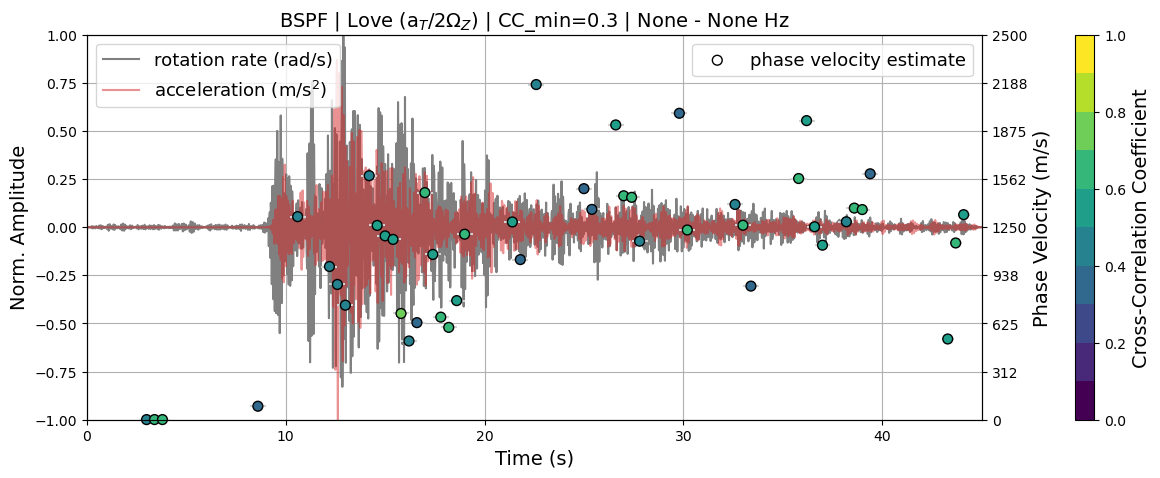

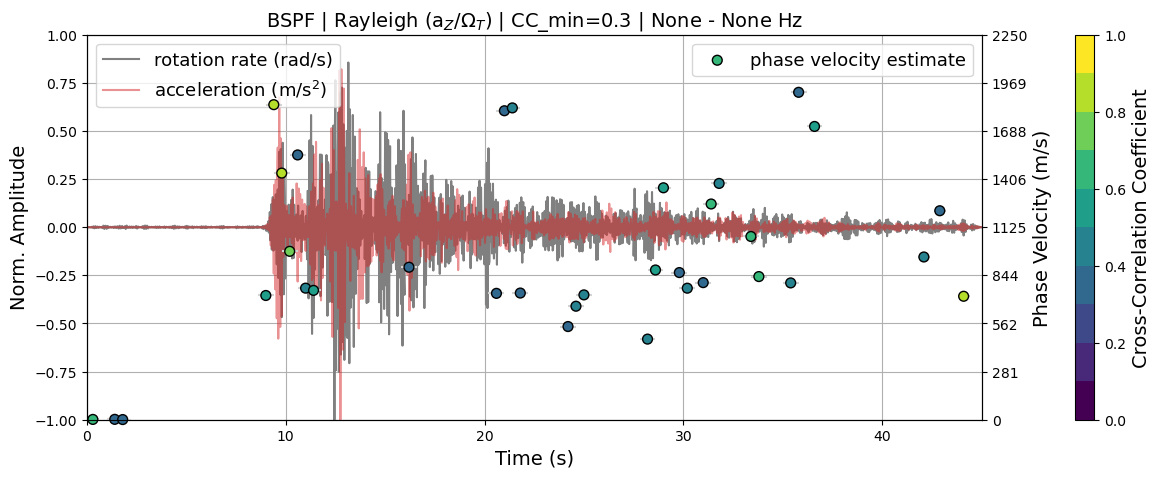

In [226]:
out = __velocity_from_amplitude_ratio(rot0,
                                      acc0,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="love",
                                      win_time_s=0.4,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

# out['fig'].savefig(config['output_figs']+f"{event_time_str}_love_velocity.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

out = __velocity_from_amplitude_ratio(rot0,
                                      acc0,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="rayleigh",
                                      win_time_s=0.4,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

# out['fig'].savefig(config['output_figs']+f"{event_time_str}_rayleigh_velocity.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

### ADR inner and PFO

In [227]:
# config['fmin'], config['fmax'] = 0.16, 16.5
config['fmin'], config['fmax'] = 8, 15

st1 = st.copy();
st1.detrend("linear");
st1.taper(0.01);
st1.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

rot1 = st1.select(station="RPFO", location="in");
acc1 = st1.select(station="PFO*");

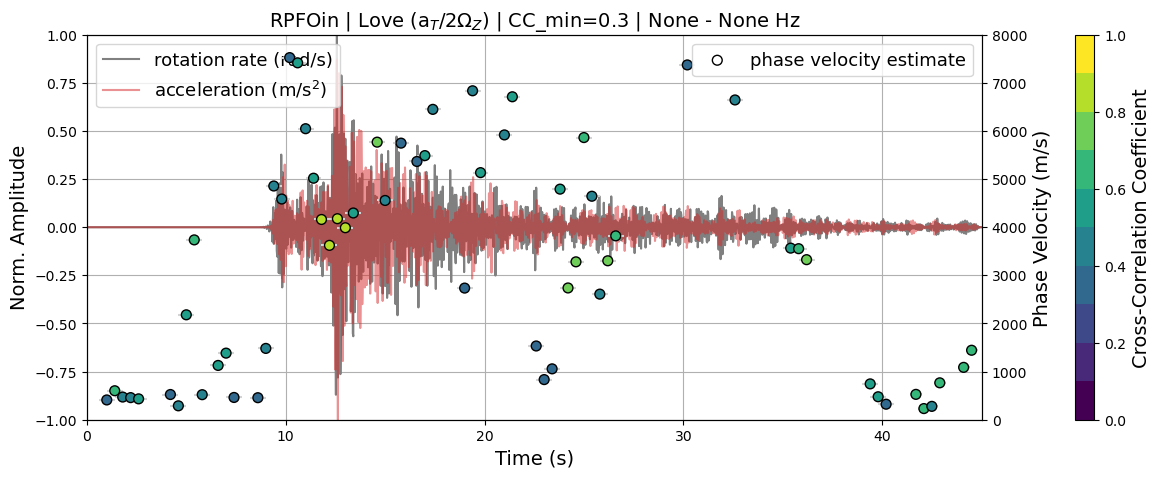

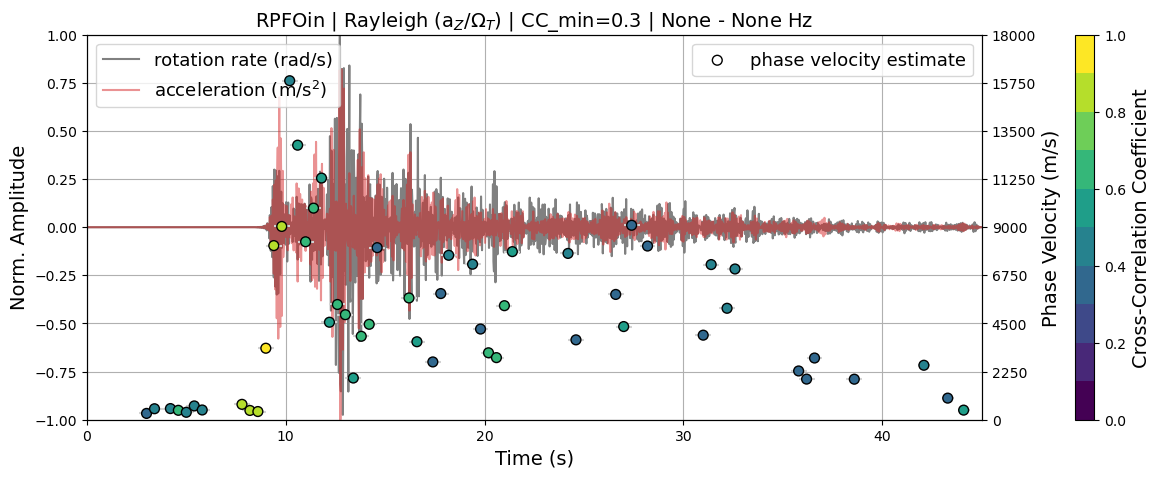

In [228]:
out = __velocity_from_amplitude_ratio(rot1,
                                      acc1,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="love",
                                      win_time_s=0.4,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

out = __velocity_from_amplitude_ratio(rot1,
                                      acc1,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="rayleigh",
                                      win_time_s=0.4,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

### ADR all and PFO

In [229]:
# config['fmin'], config['fmax'] = 0.02, 1.3
config['fmin'], config['fmax'] = 0.5, 1.0

st2 = st.copy();
st2.detrend("linear");
st2.taper(0.01);
st2.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

rot2 = st2.select(station="RPFO", location="al");
acc2 = st2.select(station="PFO*");

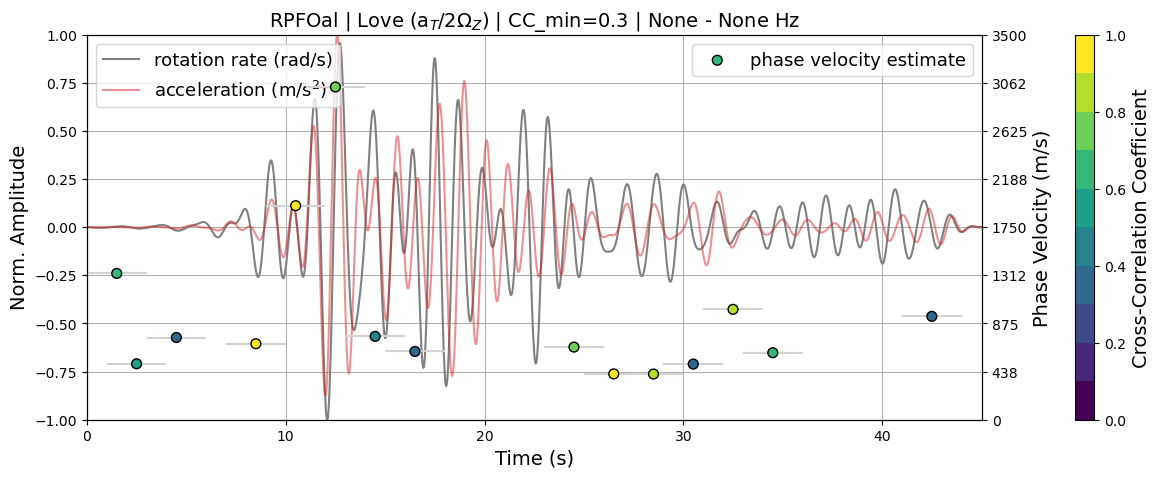

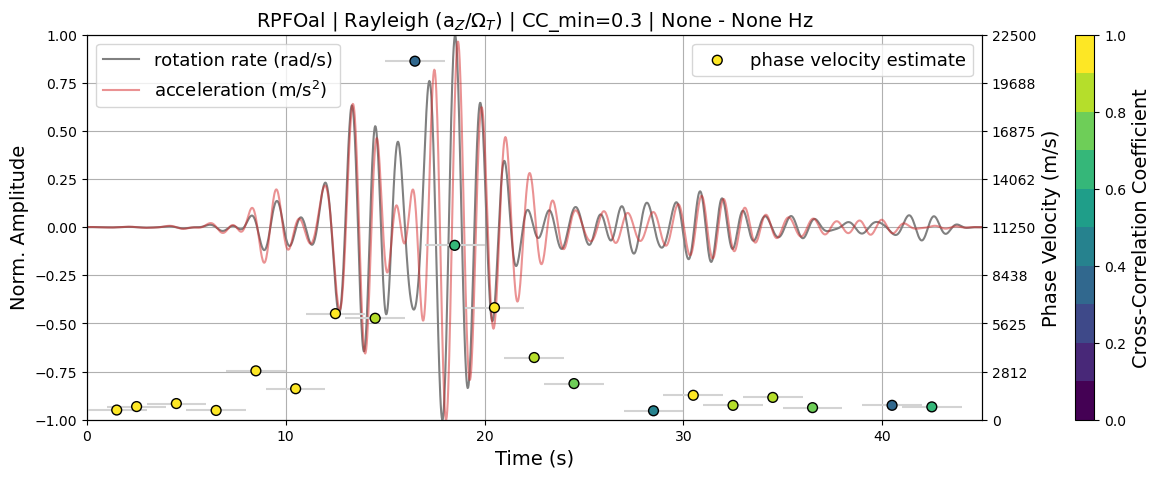

In [230]:
out = __velocity_from_amplitude_ratio(rot2,
                                      acc2,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="love",
                                      win_time_s=2,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

out = __velocity_from_amplitude_ratio(rot2,
                                      acc2,
                                      baz=trig.backazimuth.iloc[0],
                                      mode="rayleigh",
                                      win_time_s=2,
                                      cc_thres=0.3,
                                      overlap=0.5,
                                      plot=True
                                     )

## AS LOOP

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-03T16:07:09.972300Z - 2022-10-03T16:10:09.972300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-03T16:07:09.969538Z - 2022-10-03T16:10:09.969538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-03T16:07:09.972300Z - 2022-10-03T16:10:09.972300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-07T22:44:05.472300Z - 2022-10-07T22:47:05.472300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-07T22:44:05.469539Z - 2022-10-07T22:47:05.469539Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-07T22:44:05.472300Z - 2022-10-07T22:47:05.472300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-15T05:16:34.154100Z - 2022-10-15T05:19:34.154100Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-15T05:16:34.144538Z - 2022-10-15T05:19:34.144538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-15T05:16:34.154100Z - 2022-10-15T05:19:34.154100Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-23T09:23:58.153700Z - 2022-10-23T09:26:58.153700Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-23T09:23:58.144538Z - 2022-10-23T09:26:58.144538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-23T09:23:58.153700Z - 2022-10-23T09:26:58.153700Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-26T08:13:35.080400Z - 2022-10-26T08:16:35.080400Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-10-26T08:13:35.069538Z - 2022-10-26T08:16:35.069538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-10-26T08:13:35.080400Z - 2022-10-26T08:16:35.080400Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-12-31T12:11:26.653700Z - 2022-12-31T12:14:26.653700Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2022-12-31T12:11:26.644538Z - 2022-12-31T12:14:26.644538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2022-12-31T12:11:26.653700Z - 2022-12-31T12:14:26.653700Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-09T19:41:56.463300Z - 2023-01-09T19:44:56.463300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-09T19:41:56.469539Z - 2023-01-09T19:44:56.469539Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-09T19:41:56.463300Z - 2023-01-09T19:44:56.463300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-11T18:58:20.008200Z - 2023-01-11T19:01:20.008200Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-11T18:58:20.019538Z - 2023-01-11T19:01:20.019538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-11T18:58:20.008200Z - 2023-01-11T19:01:20.008200Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-15T09:57:54.073100Z - 2023-01-15T10:00:54.073100Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-01-15T09:57:54.069538Z - 2023-01-15T10:00:54.069538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-01-15T09:57:54.073100Z - 2023-01-15T10:00:54.073100Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-02-01T09:04:02.322300Z - 2023-02-01T09:07:02.322300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-02-01T09:04:02.319538Z - 2023-02-01T09:07:02.319538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-02-01T09:04:02.322300Z - 2023-02-01T09:07:02.322300Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-03-01T22:48:03.557400Z - 2023-03-01T22:51:03.557400Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-03-01T22:48:03.569538Z - 2023-03-01T22:51:03.569538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-03-01T22:48:03.557400Z - 2023-03-01T22:51:03.557400Z | 40.0 Hz, 

/tmp/ipykernel_47465/1765002945.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1,figsize=(15,5))


12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-03-24T13:44:13.702000Z - 2023-03-24T13:47:13.702000Z | 40.0 Hz, 

12 Trace(s) in Stream:
II.PFO.10.BHE  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHN  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.PFO.10.BHZ  | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJE | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJN | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.al.BJZ | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJE | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJN | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
II.RPFO.in.BJZ | 2023-03-24T13:44:13.694538Z - 2023-03-24T13:47:13.694538Z | 40.0 Hz, 7201 samples
PY.BSPF..HJE   | 2023-03-24T13:44:13.702000Z - 2023-03-24T13:47:13.702000Z | 40.0 Hz, 

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-10T14:50:00.951800Z - 2023-04-10T14:53:00.951800Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-10T14:50:00.950000Z - 2023-04-10T14:53:00.950000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-17T18:51:36.931700Z - 2023-04-17T18:54:36.931700Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-17T18:51:36.930000Z - 2023-04-17T18:54:36.930000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-04-26T06:45:58.448400Z - 2023-04-26T06:48:58.448400Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-04-26T06:45:58.450000Z - 2023-04-26T06:48:58.450000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-05-03T21:13:20.211700Z - 2023-05-03T21:16:20.211700Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-05-03T21:13:20.210000Z - 2023-05-03T21:16:20.210000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z

12 Trace(s) in Stream:
PY.BSPF..HJE   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJN   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.BSPF..HJZ   | 2023-05-20T08:17:16.238800Z - 2023-05-20T08:20:16.238800Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHE  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHN  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.PFOIX..HHZ  | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 200.0 Hz, 36001 samples
PY.RPFO.al.BJE | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJN | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.al.BJZ | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z | 40.0 Hz, 7201 samples
PY.RPFO.in.BJE | 2023-05-20T08:17:16.240000Z - 2023-05-20T08:20:16.240000Z

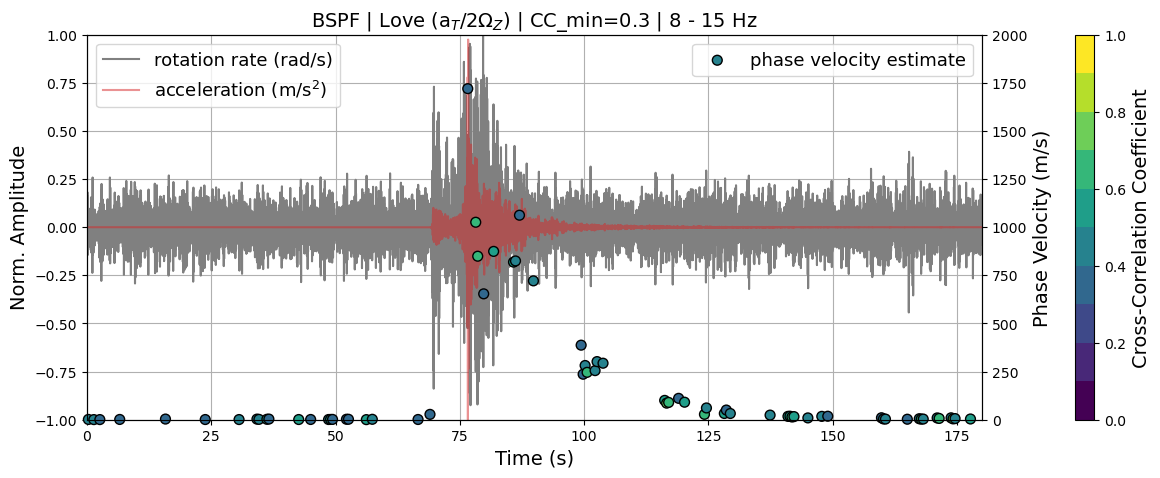

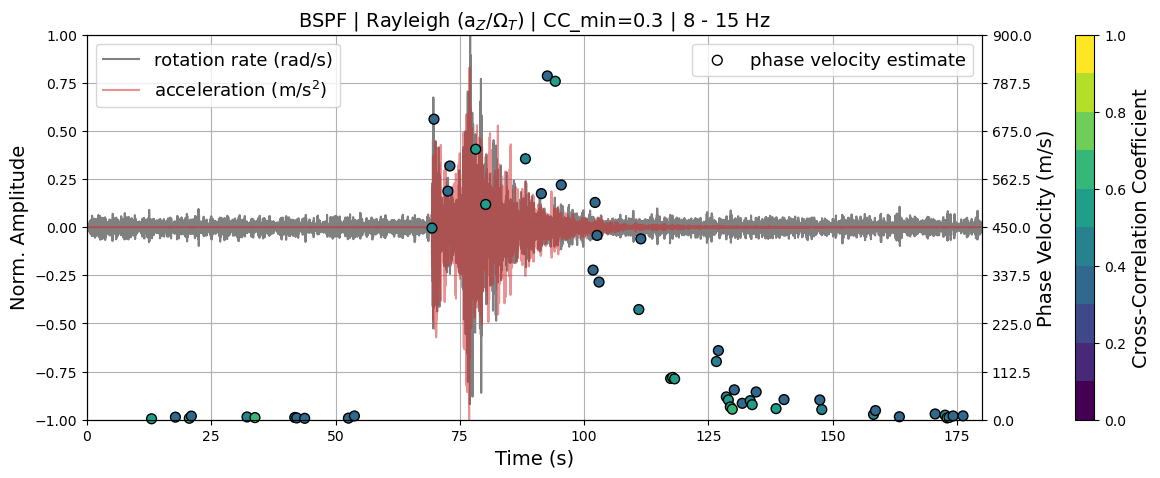

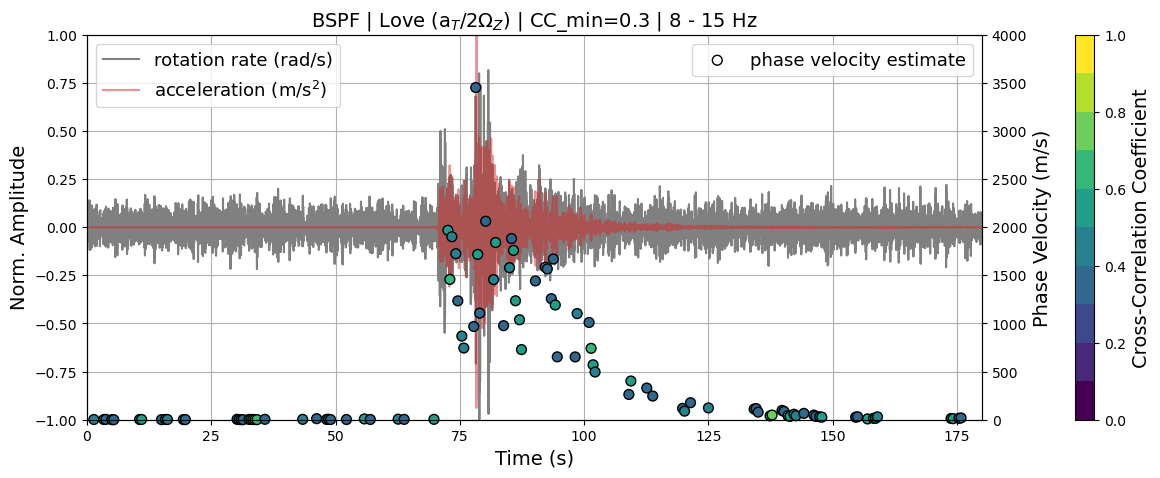

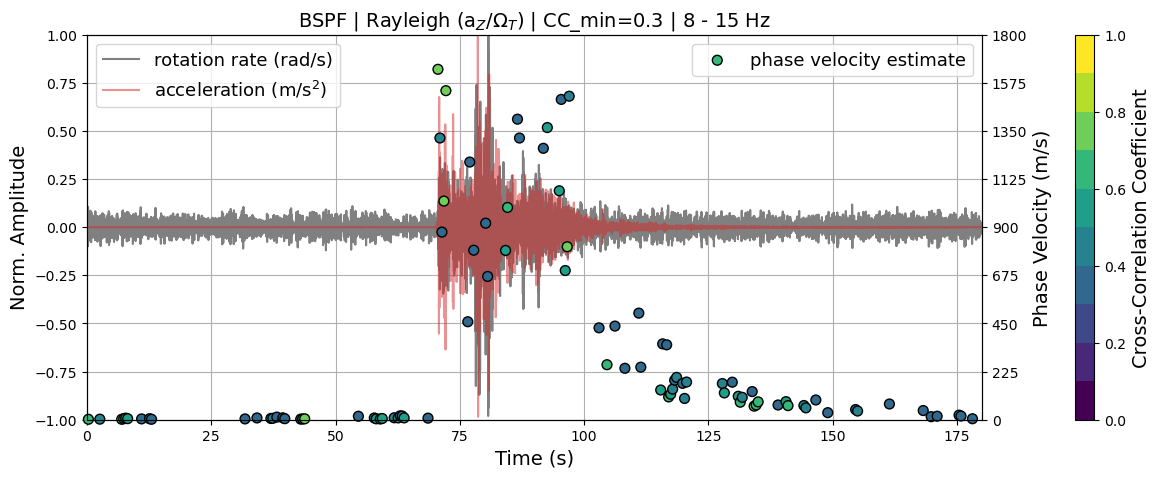

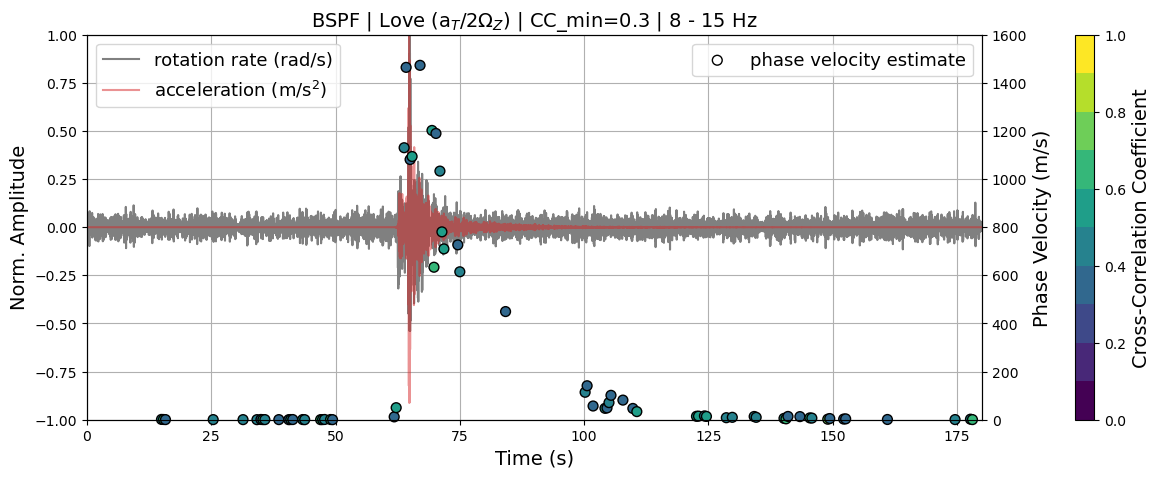

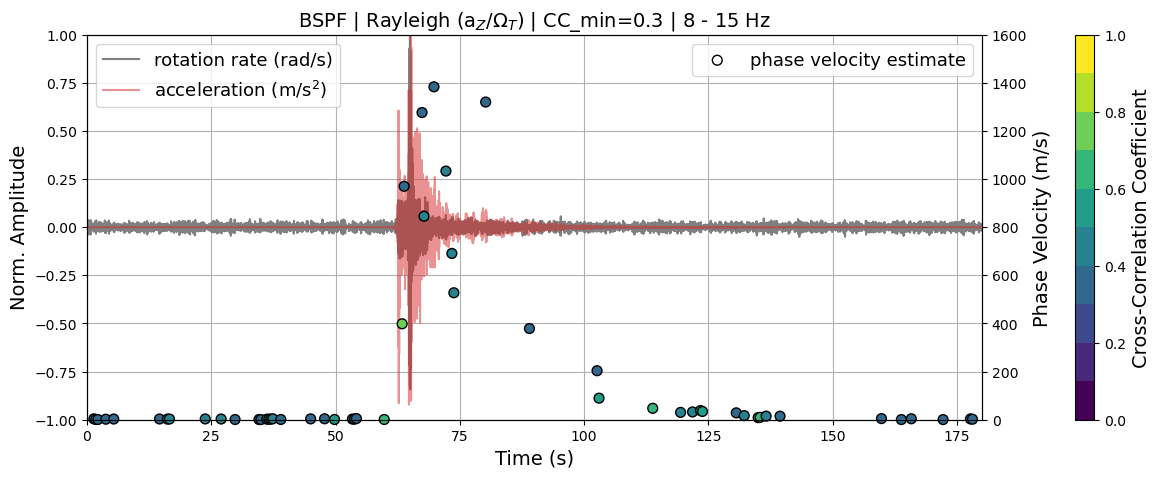

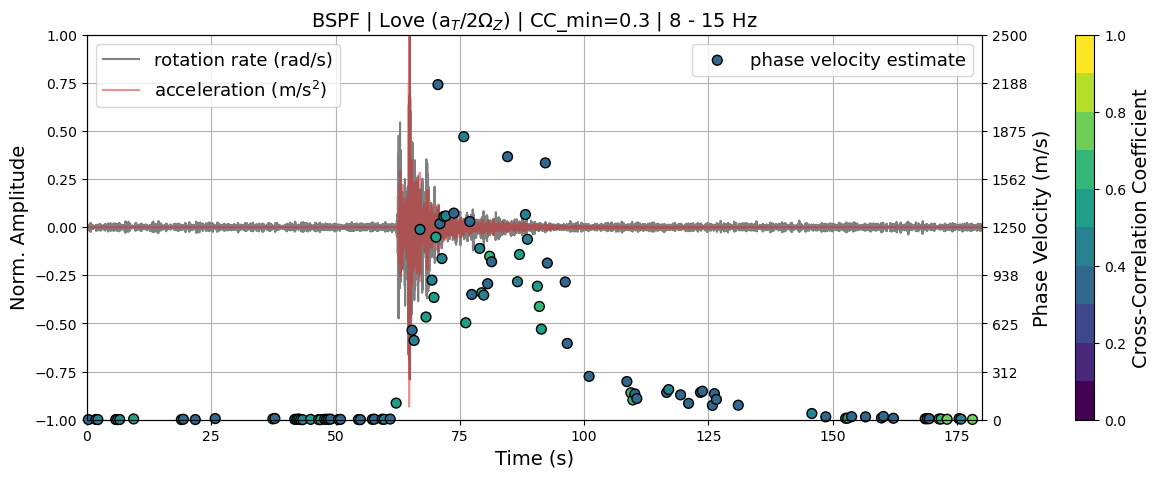

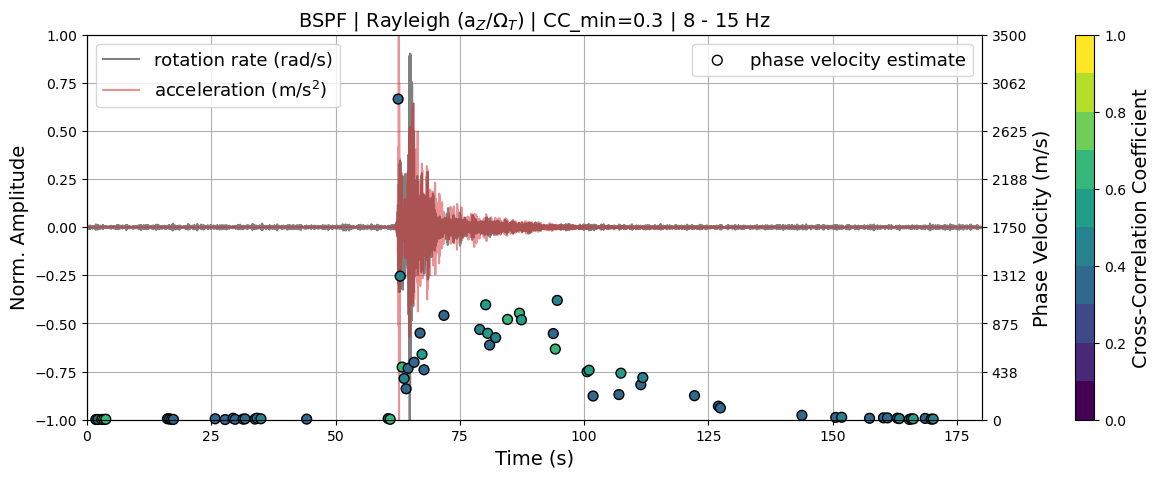

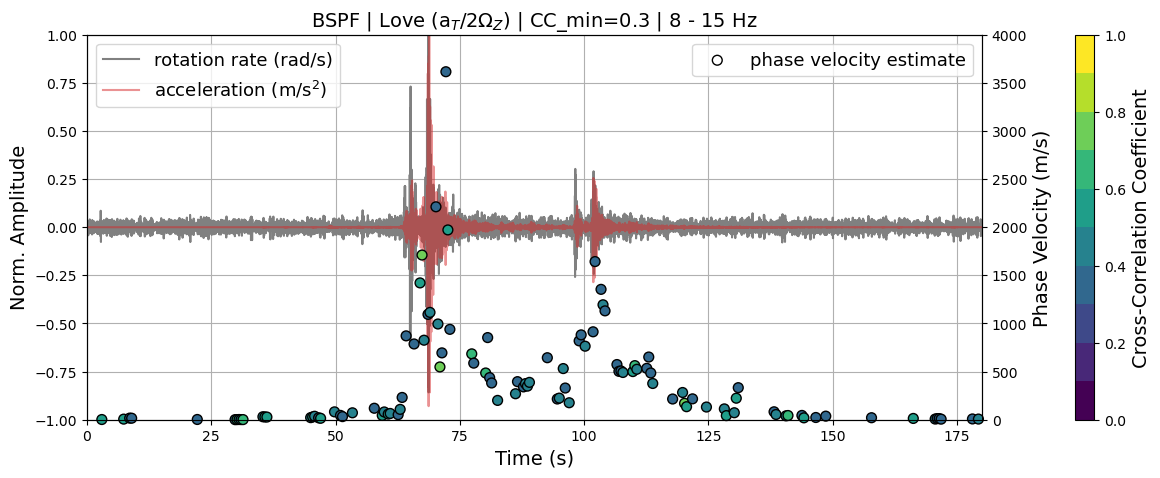

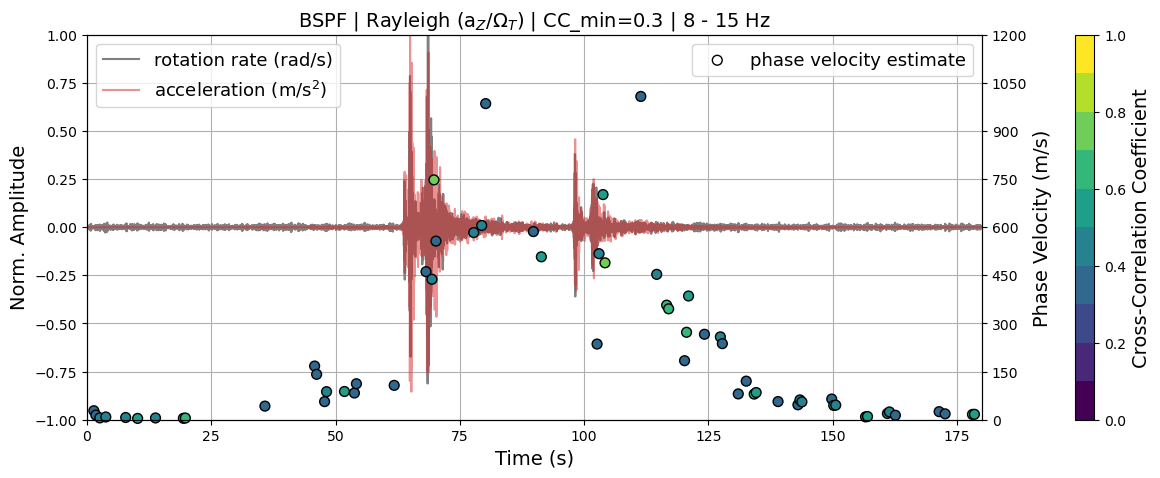

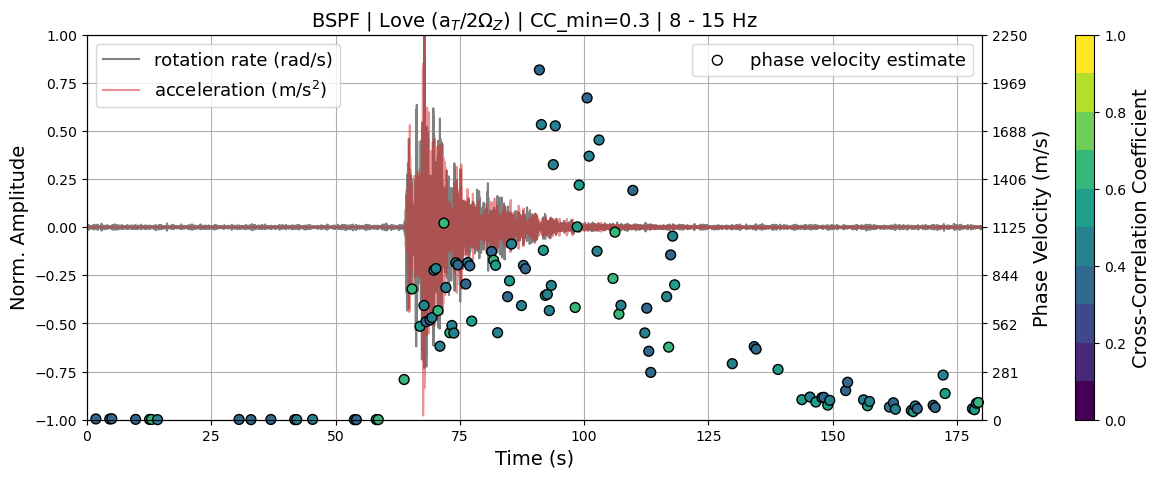

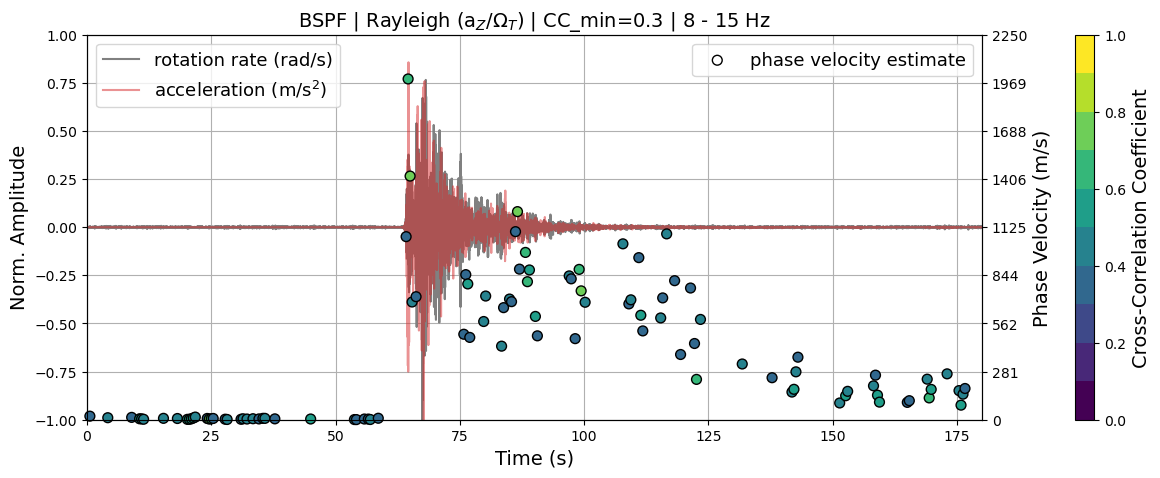

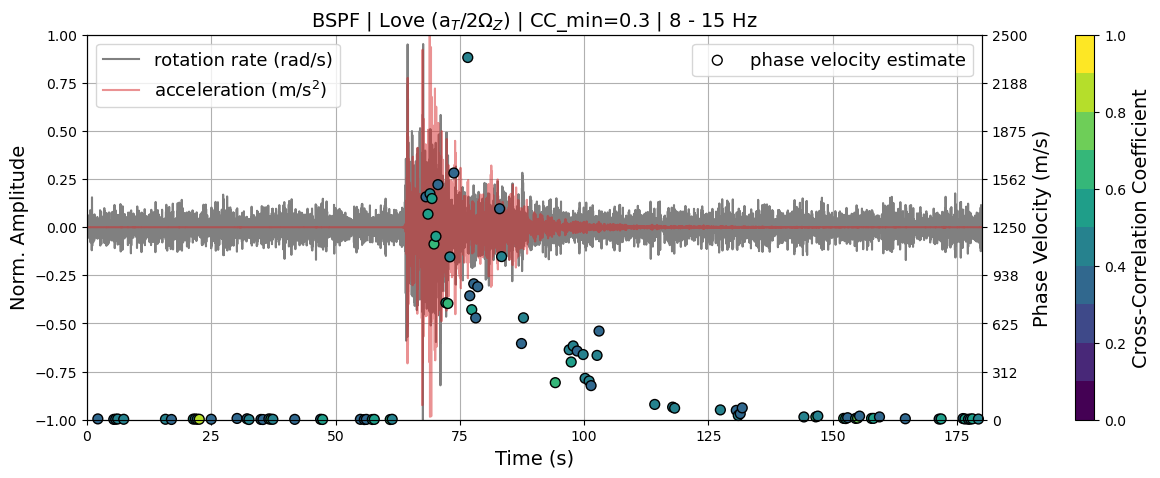

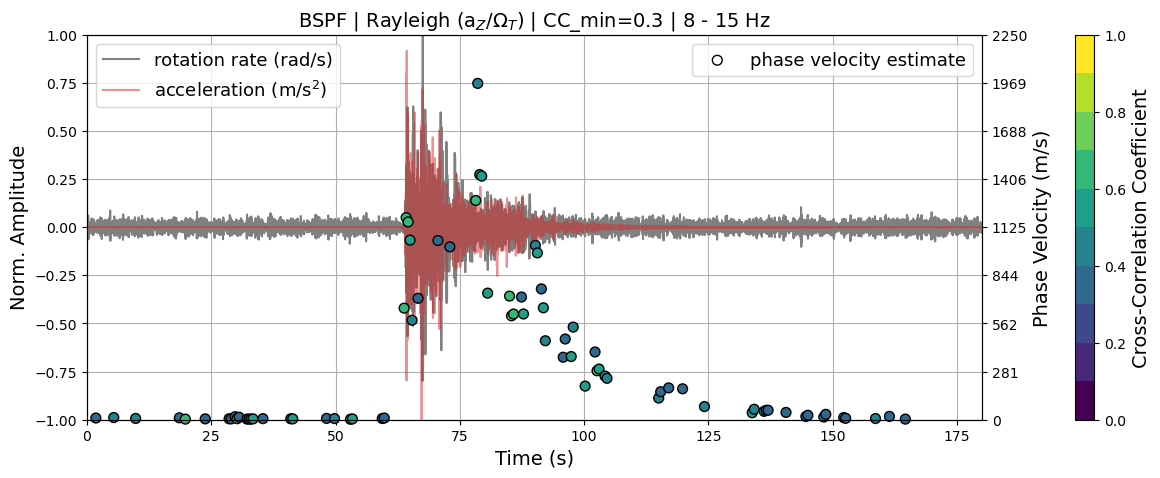

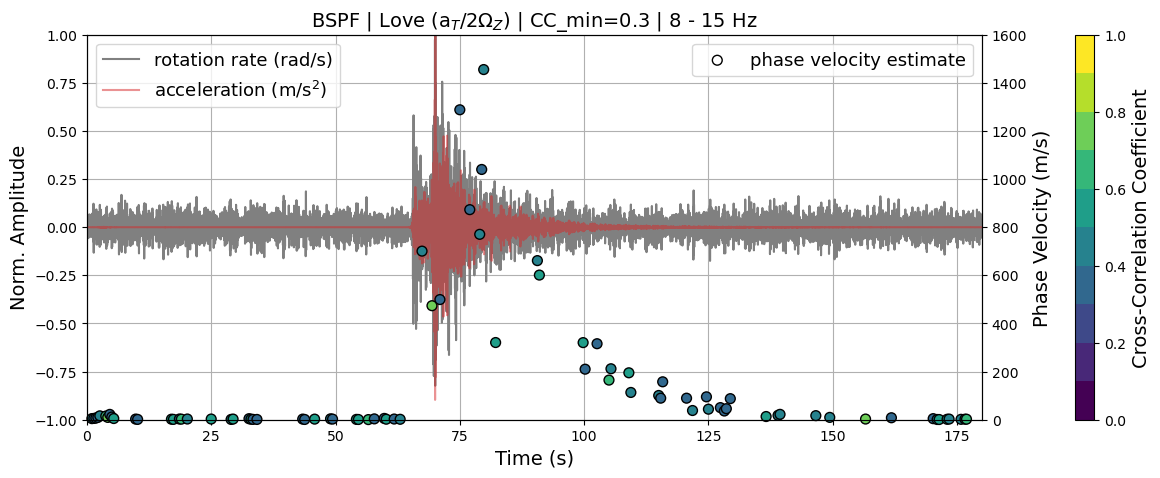

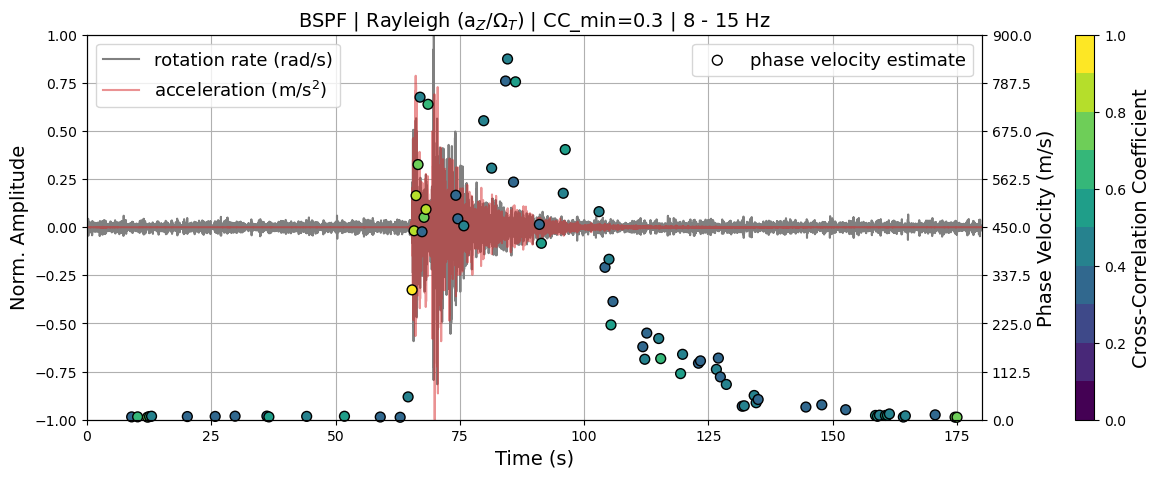

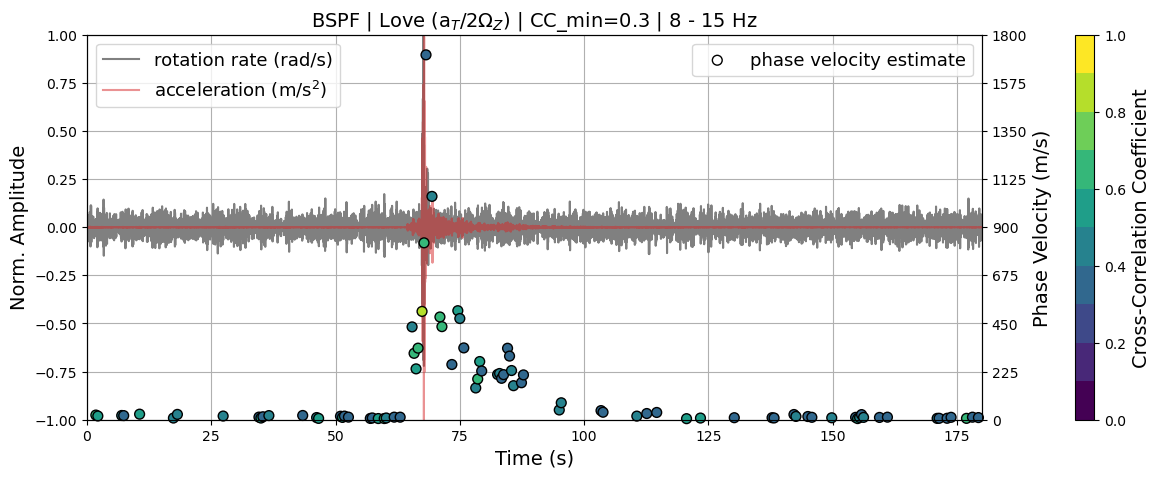

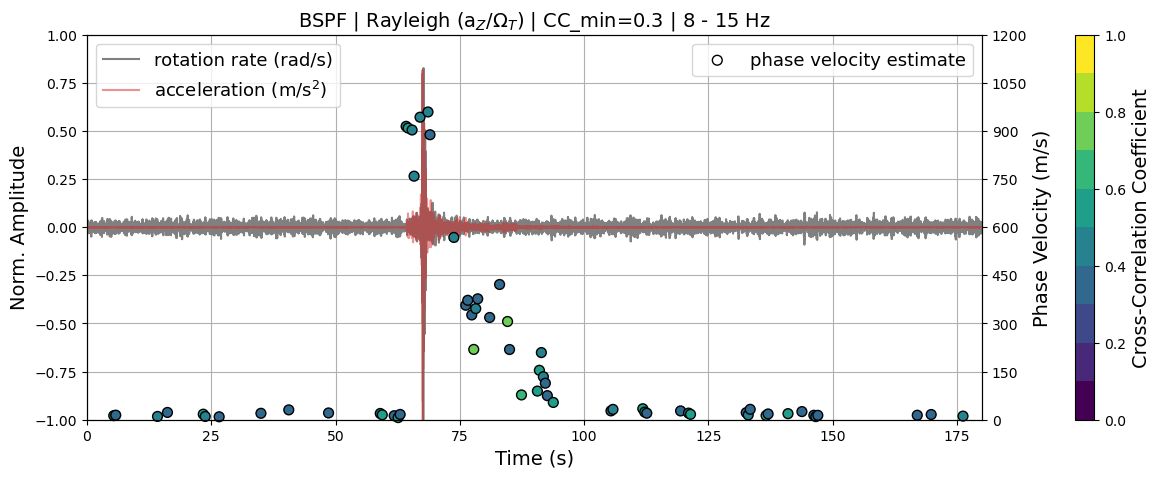

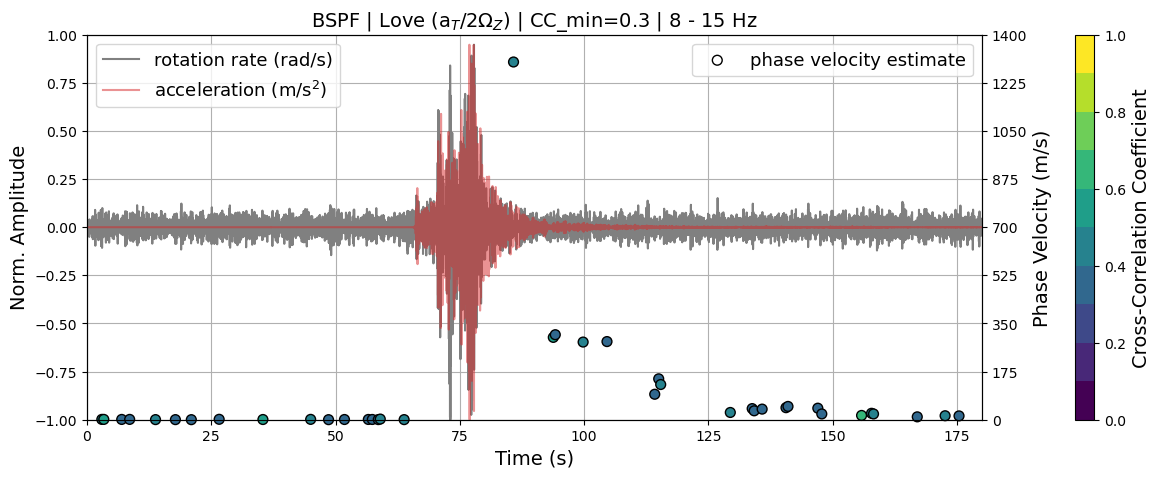

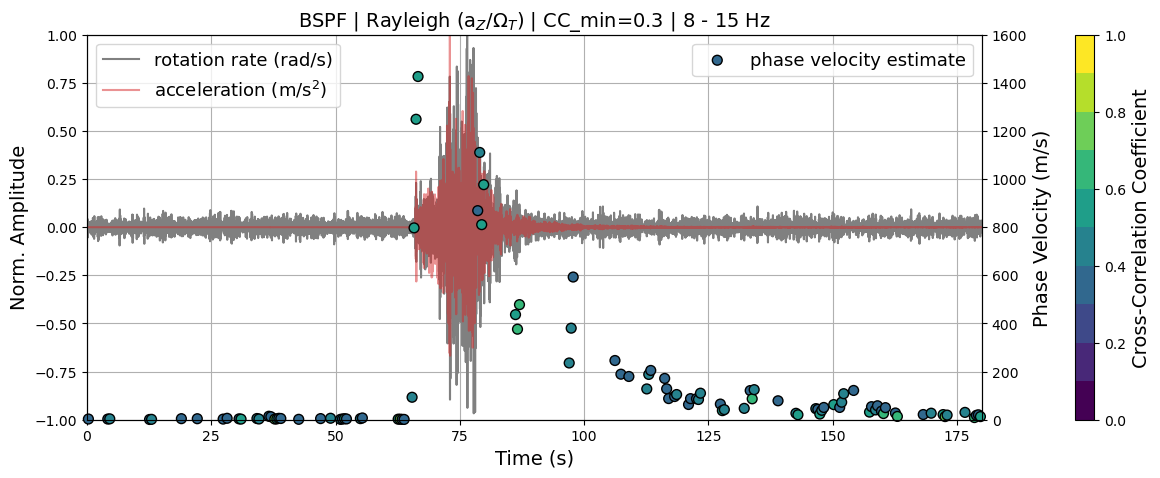

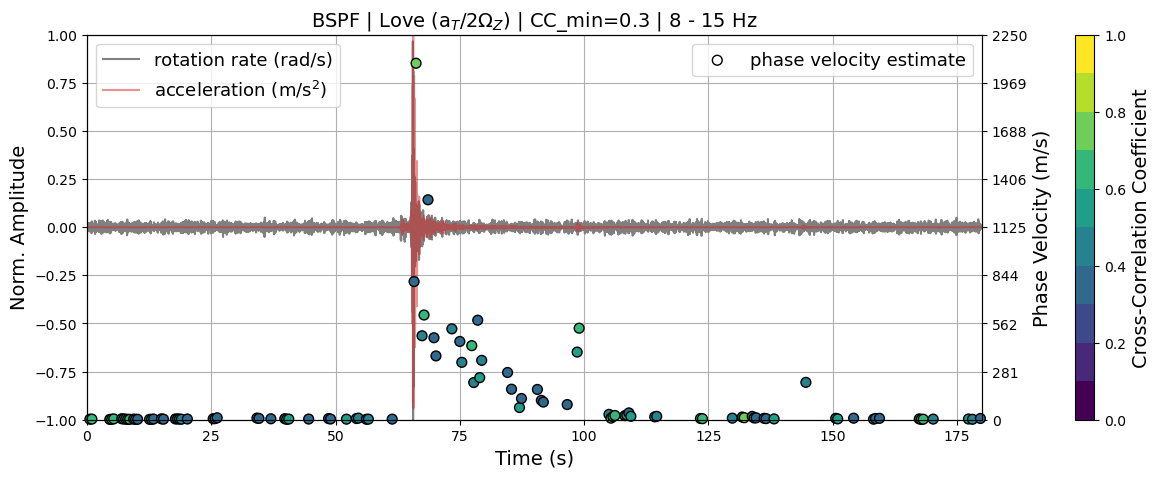

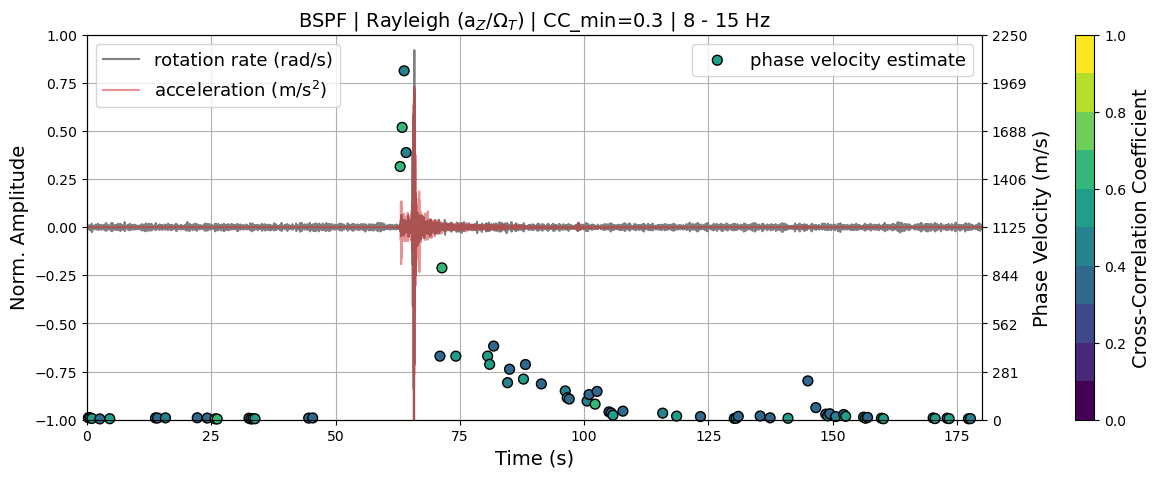

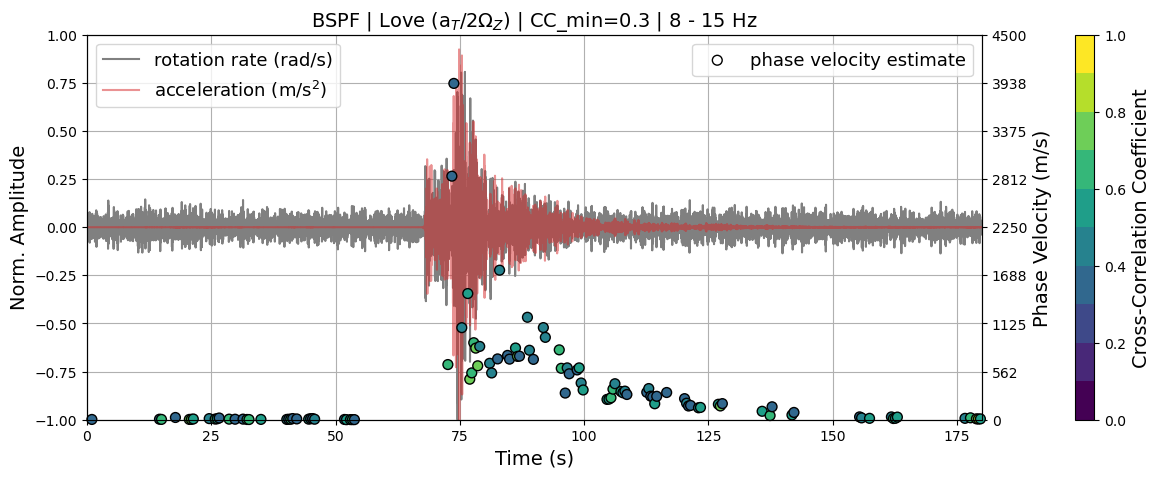

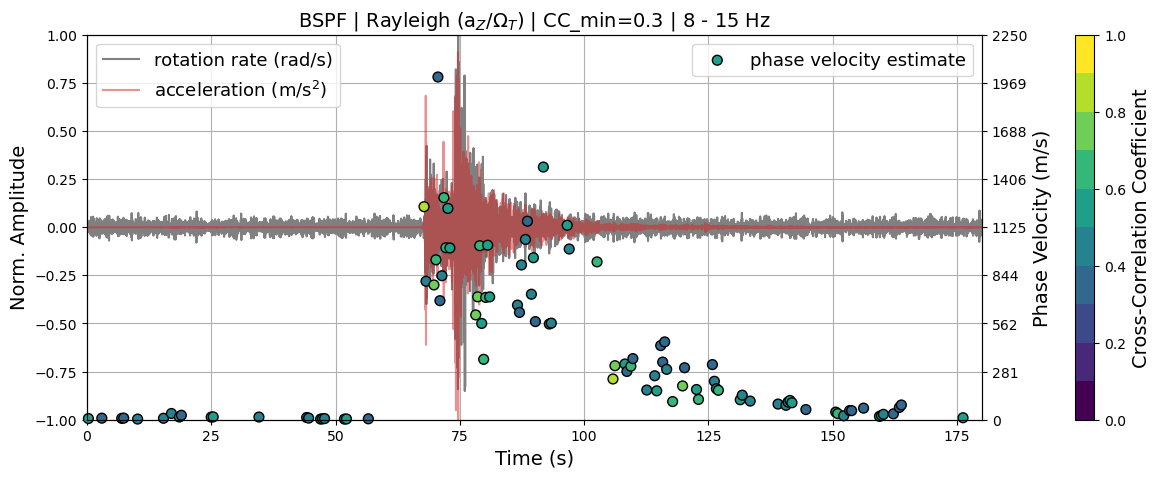

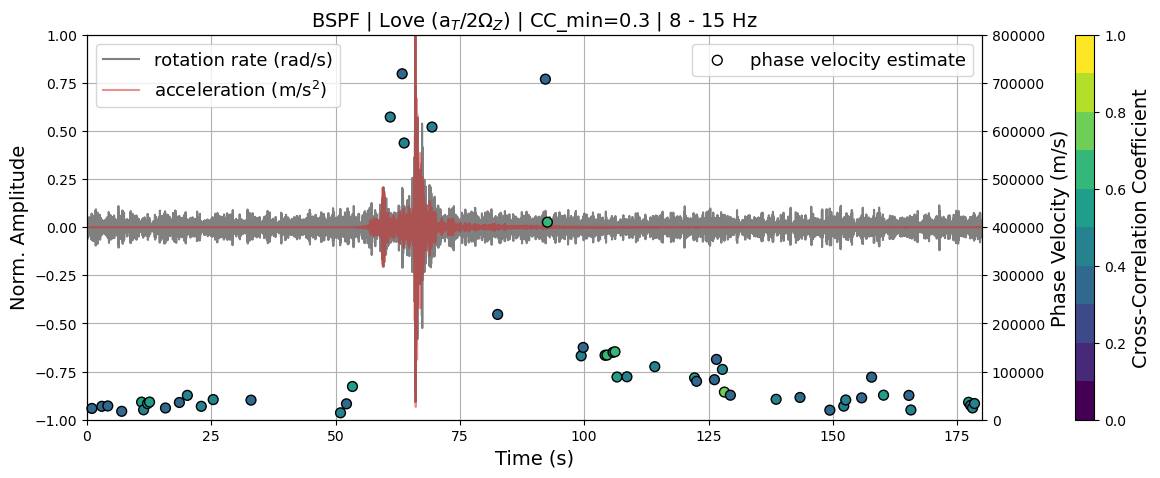

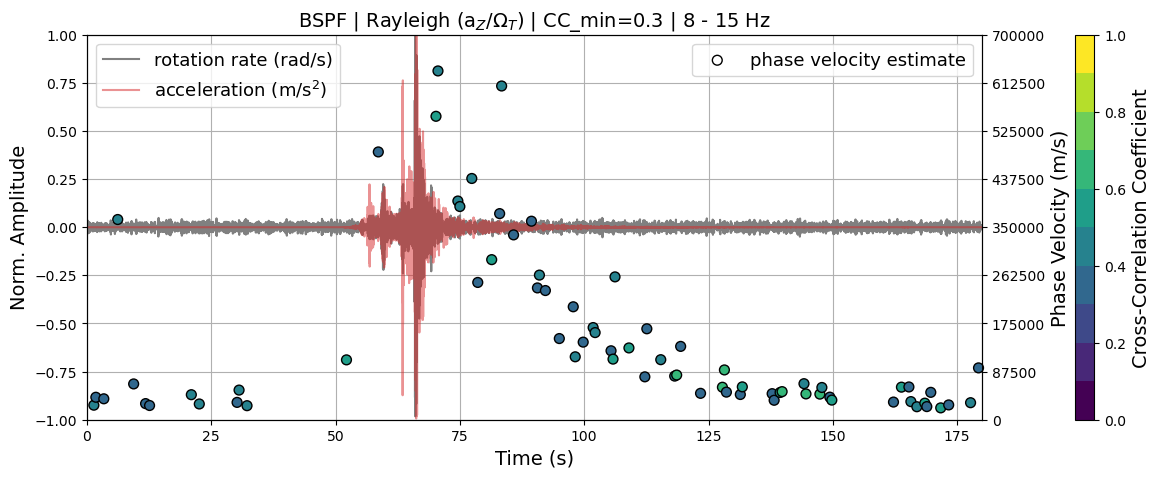

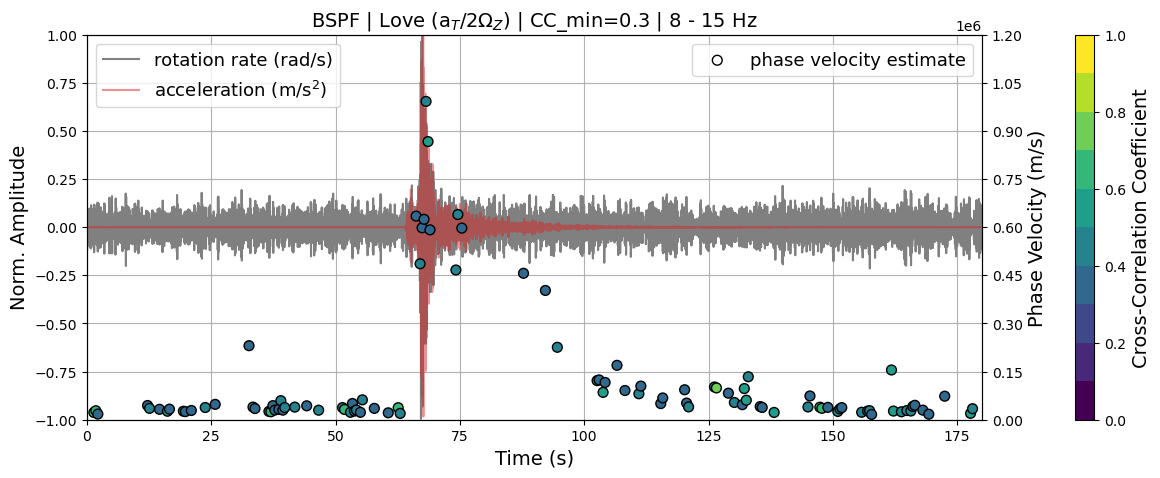

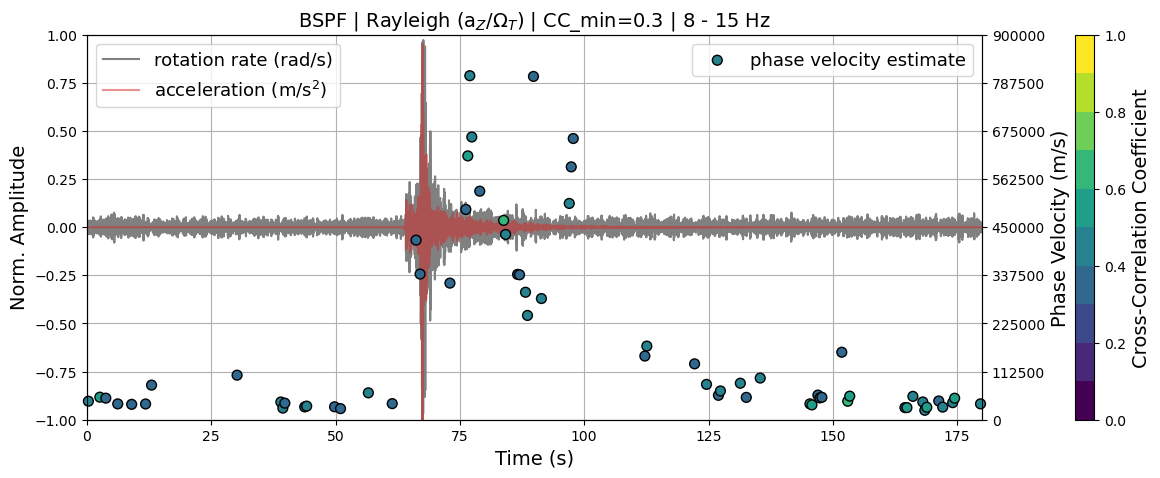

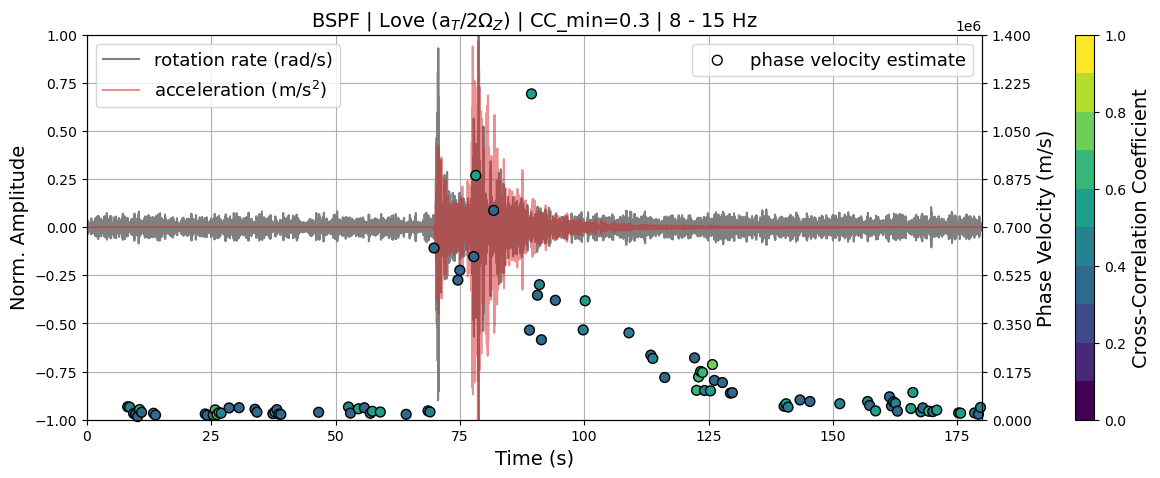

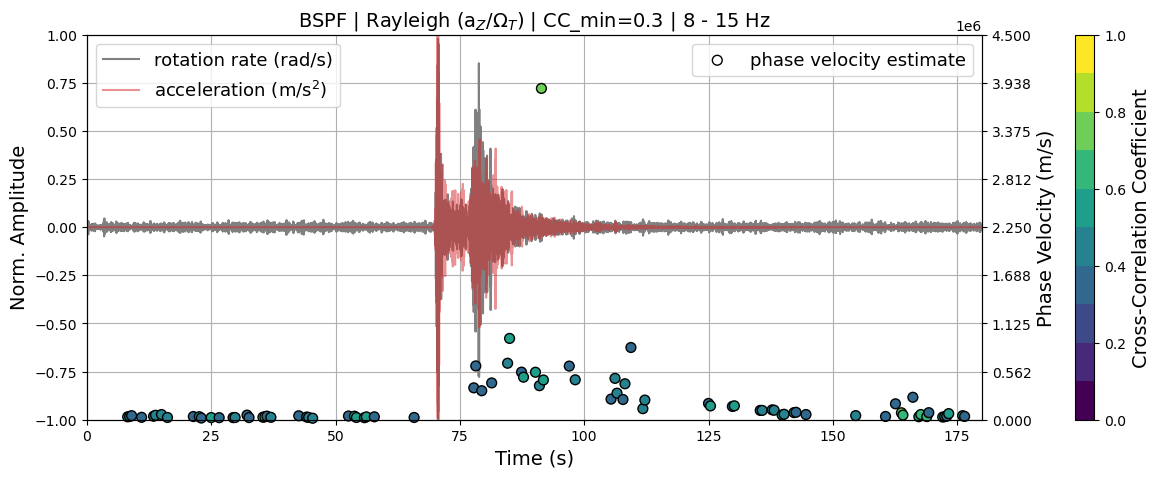

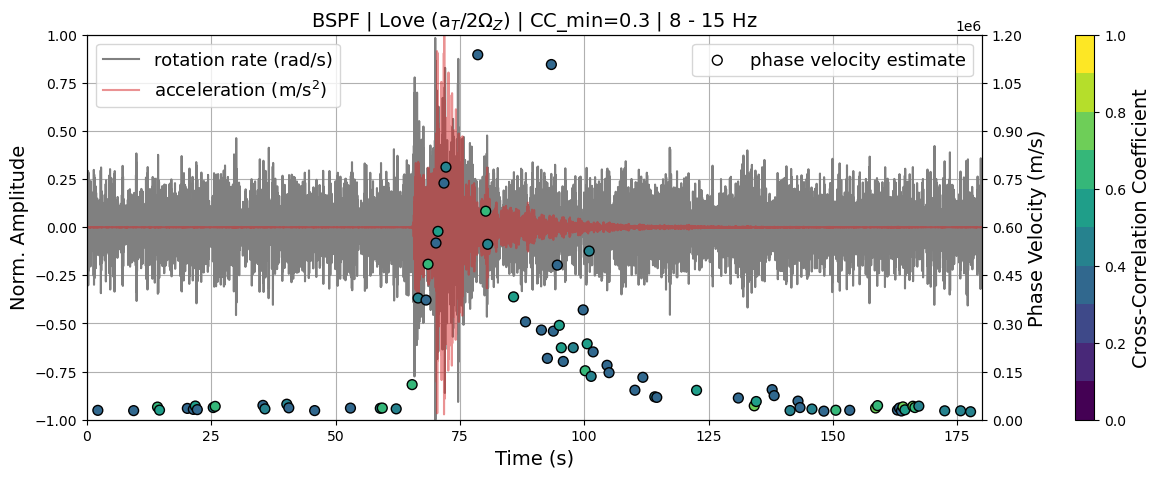

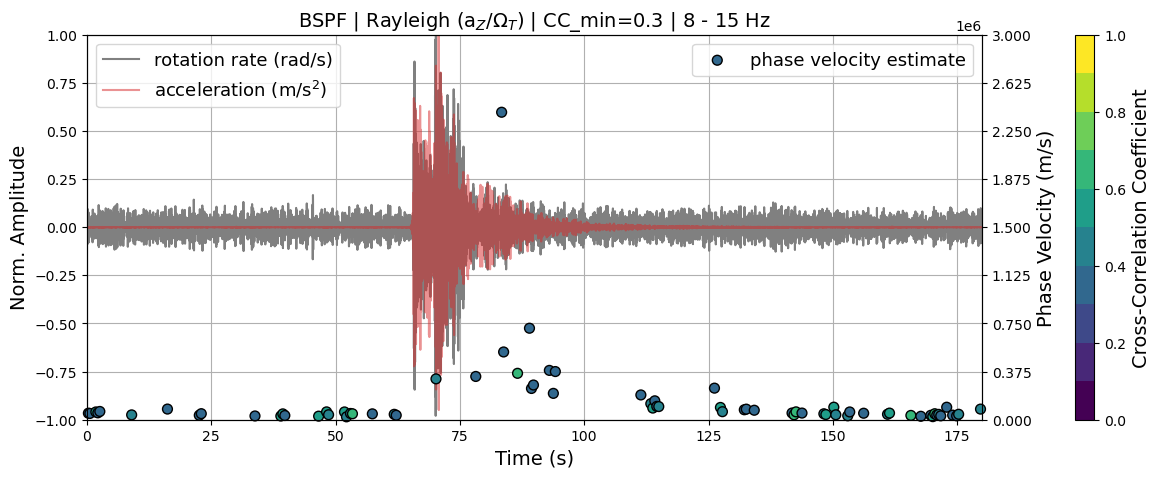

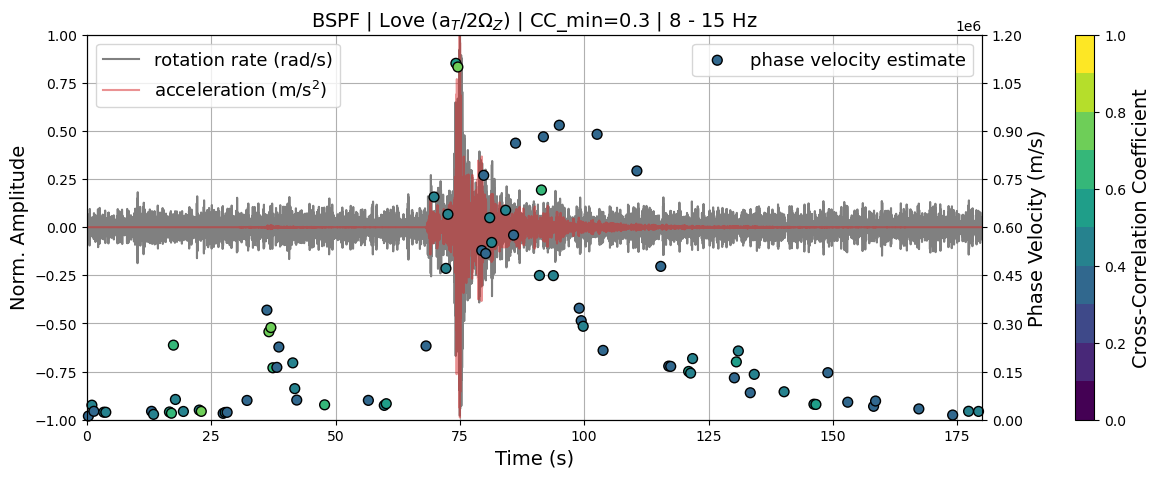

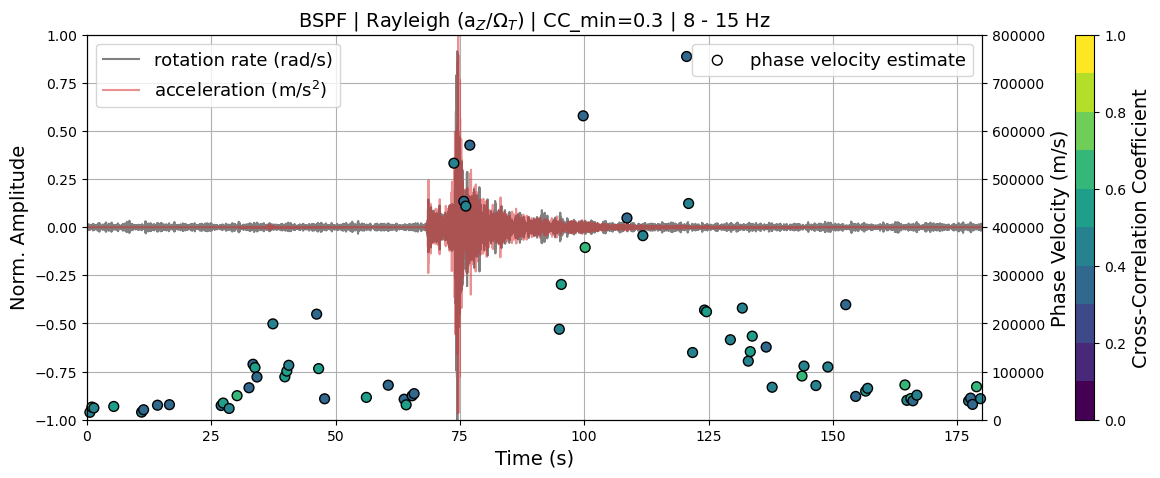

In [203]:
## select traces
sta, loc = "BSPF", ""
config['fmin'], config['fmax'] = 8, 15

# sta, loc = "RPFO", "in"
# config['fmin'], config['fmax'] = 8, 15

# sta, loc = "RPFO", "al"
# config['fmin'], config['fmax'] = 0.1, 1.0




for i in range(0, 17):

    event_time = event_times.origin_time.loc[i]

    try:
        event = events.filter(f"time >= {event_time}",f"time <= {event_time}")

        event_time = event_times.origin_time.loc[i]

        trig = triggered[triggered.origin == event_time]

    except:
        print(f" -> {i} no event")

    ## prepare string
    event_time_str = event_time.split(".")[0].replace(" ","_").replace("-","").replace(":","")

    ## load data
    st = obs.read(config['path_to_mseed']+f"*{event_time_str}*");

    st.detrend("simple");

    st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);



    rot = st.select(station=sta, location=loc);

    acc = st.select(station="PFO*");

    out = __velocity_from_amplitude_ratio(rot,
                                          acc,
                                          baz=trig.backazimuth.iloc[0],
                                          mode="love",
                                          win_time_s=0.4,
                                          cc_thres=0.3,
                                          overlap=0.5,
                                          plot=True,
                                          flim=(config['fmin'],config['fmax']),
                                         )

    out['fig'].savefig(config['output_figs']+f"{event_time_str}_{sta}{loc}_love_velocity.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


    out = __velocity_from_amplitude_ratio(rot,
                                          acc,
                                          baz=trig.backazimuth.iloc[0],
                                          mode="rayleigh",
                                          win_time_s=0.4,
                                          cc_thres=0.3,
                                          overlap=0.5,
                                          plot=True,
                                          flim=(config['fmin'],config['fmax']),
                                         )

    out['fig'].savefig(config['output_figs']+f"{event_time_str}_{sta}{loc}_rayleigh_velocity.png", dpi=200, bbox_inches='tight', pad_inches=0.05)